pregatire data set

In [8]:
import os
from PIL import Image
import numpy as np
import shutil

def apply_sepia(img):
    img = img.convert("RGB")
    np_img = np.array(img).astype(float)

    sepia_filter = np.array([
        [0.393, 0.769, 0.189],
        [0.349, 0.686, 0.168],
        [0.272, 0.534, 0.131]
    ])

    sepia_img = np_img @ sepia_filter.T
    sepia_img = np.clip(sepia_img, 0, 255).astype(np.uint8)

    return Image.fromarray(sepia_img)

def build_sepia_dataset(original_dir="pictures", target_dir="dataset"):
    original_target = os.path.join(target_dir, "pictures")
    sepia_target = os.path.join(target_dir, "sepia")

    os.makedirs(original_target, exist_ok=True)
    os.makedirs(sepia_target, exist_ok=True)

    for filename in os.listdir(original_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            path = os.path.join(original_dir, filename)

            try:
                img = Image.open(path)
                # Save original
                shutil.copy(path, os.path.join(original_target, filename))

                # Save sepia version
                sepia_img = apply_sepia(img)
                sepia_filename = os.path.splitext(filename)[0] + "_sepia.jpg"
                sepia_img.save(os.path.join(sepia_target, sepia_filename))

                print(f"[✓] Processed: {filename}")
            except Exception as e:
                print(f"[✗] Error with {filename}: {e}")

build_sepia_dataset()

[✓] Processed: DSC06441.jpg
[✓] Processed: DSC06442 - Copy.jpg
[✓] Processed: DSC06442.jpg
[✓] Processed: DSC06447.jpg
[✓] Processed: DSC06462.jpg
[✓] Processed: DSC06482.jpg
[✓] Processed: DSC06496.jpg
[✓] Processed: DSC06498.jpg
[✓] Processed: WhatsApp Image 2025-03-20 at 19.08.04 (1).jpeg
[✓] Processed: WhatsApp Image 2025-03-20 at 19.08.04 (2).jpeg
[✓] Processed: WhatsApp Image 2025-03-20 at 19.08.04 (3).jpeg
[✓] Processed: WhatsApp Image 2025-03-20 at 19.08.04 (4).jpeg
[✓] Processed: WhatsApp Image 2025-03-20 at 19.08.04.jpeg
[✓] Processed: WhatsApp Image 2025-03-20 at 19.08.06 (1).jpeg
[✓] Processed: WhatsApp Image 2025-03-20 at 19.08.06 (2).jpeg
[✓] Processed: WhatsApp Image 2025-03-20 at 19.08.06 (3).jpeg
[✓] Processed: WhatsApp Image 2025-03-20 at 19.08.06 (4).jpeg
[✓] Processed: WhatsApp Image 2025-03-20 at 19.08.06 (5).jpeg
[✓] Processed: WhatsApp Image 2025-03-20 at 19.08.07 (1).jpeg
[✓] Processed: WhatsApp Image 2025-04-17 at 02.03.21.jpeg
[✓] Processed: WhatsApp Image 202

ANN - cu tool 


 Acuratețea modelului (ANN tool): 61.54%


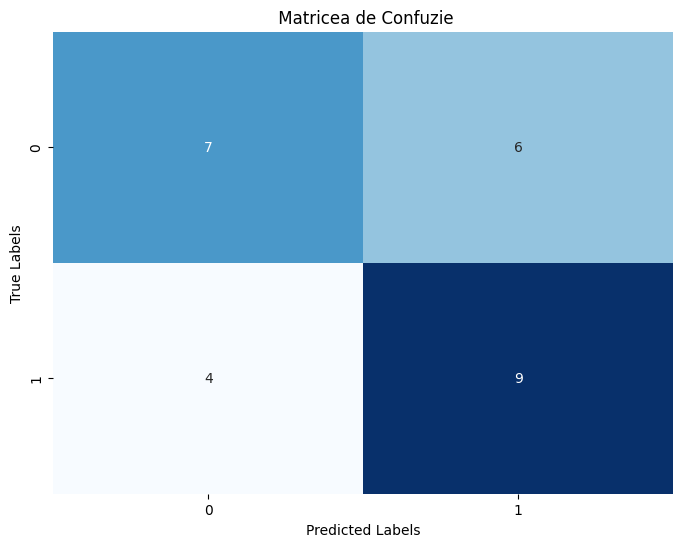

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

def load_flattened_dataset(data_dir="dataset", image_size=(64, 64)):
    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor()
    ])

    dataset = datasets.ImageFolder(data_dir, transform=transform)
    X = []
    y = []

    for img_tensor, label in dataset:
        X.append(img_tensor.view(-1).numpy())  # flatten image
        y.append(label)

    return np.array(X), np.array(y)

import matplotlib.pyplot as plt
import seaborn as sns

def train_ann_with_tool(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

    clf = MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='adam',
        max_iter=1000,
        random_state=42,
        learning_rate_init=0.001
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n Acuratețea modelului (ANN tool): {acc * 100:.2f}%")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(" Matricea de Confuzie")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

X, y = load_flattened_dataset("dataset", image_size=(64, 64))
model = train_ann_with_tool(X, y) 

Analiza parametrilor: 
- initial am primit o acuratete de 51% cu tool, si apoi am schimbat learning rate ul sa fie de 0.001 si am adaugat mai multe epoci ( aici hidden layer ul avea size-ul de (128,64) 
- dupa schimbare am ajuns la un learning rate de 61%... dar se poate mai bine
- am schimbat numarul de epoci de la 500 la 1000 => acuratetea modelului nu s-a schimbat 
- sa adaugam mai multe noduri in reteaua hidden, mai exact hidden_layer_sizes=(256, 128, 64), dar acuratetea a scazut la 57% => overfitting
- 

<H2> ANN - COD PROPRIU </H2> 

prelucrarea pozelor fara torch

In [16]:
def load_sepia_data_owned(folder="dataset", size=(64, 64)):
    X = []
    y = []

    for label, subfolder in enumerate(["pictures", "sepia"]):
        path = os.path.join(folder, subfolder)
        for fname in os.listdir(path):
            if fname.endswith((".jpg", ".jpeg", ".png")):
                img = Image.open(os.path.join(path, fname)).convert("L").resize(size)
                arr = np.array(img).flatten() / 255.0
                X.append(arr)
                y.append(label)

    X = np.array(X)
    y = np.array(y).reshape(-1, 1)

    idx = np.random.permutation(len(X))
    return X[idx], y[idx] 

def separate_date(inputs, outputs):
  np.random.seed(5)
  indexes = [i for i in range(len(inputs))]
  trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
  validationSample = [i for i in indexes  if not i in trainSample]
  trainInputs = [inputs[i] for i in trainSample]
  trainOutputs = [outputs[i] for i in trainSample]
  validationInputs = [inputs[i] for i in validationSample]
  validationOutputs = [outputs[i] for i in validationSample]
  return trainInputs, trainOutputs, validationInputs, validationOutputs

model ANN

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

def binary_cross_entropy(y_true, y_pred):
    eps = 1e-8
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

class ANN:
    def __init__(self, input_size, hidden_size):
       self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
       self.b1 = np.zeros((1, hidden_size))
       self.W2 = np.random.randn(hidden_size, 1) * np.sqrt(2 / hidden_size)
       self.b2 = np.zeros((1, 1))

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, output, lr=0.01):
        m = len(y)
        dZ2 = output - y
        dW2 = self.A1.T @ dZ2 / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * relu_deriv(self.Z1)
        dW1 = X.T @ dZ1 / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def train(self, X, y, epochs=1000, lr=0.01):
        for i in range(epochs):
            output = self.forward(X)
            loss = binary_cross_entropy(y, output)
            self.backward(X, y, output, lr)
            if i % 100 == 0:
                print(f"Epoch {i}: loss = {loss:.4f}")
                
        losses = []
        for i in range(epochs):
           output = self.forward(X)
           loss = binary_cross_entropy(y, output)
           losses.append(loss)
           self.backward(X, y, output, lr)
           if i % 100 == 0:
             print(f"Epoch {i}: loss = {loss:.4f}")

        plt.plot(losses)
        plt.xlabel("Epocă")
        plt.ylabel("Loss")
        plt.title("Loss în timp")
        plt.grid(True)
        plt.show()

    def predict(self, X):
        output = self.forward(X)
        return (output >= 0.5).astype(int)

{np.int64(0): np.int64(50), np.int64(1): np.int64(50)}
Epoch 0: loss = 0.7047
Epoch 100: loss = 0.6961
Epoch 200: loss = 0.6944
Epoch 300: loss = 0.6932
Epoch 400: loss = 0.6922
Epoch 500: loss = 0.6912
Epoch 600: loss = 0.6903
Epoch 700: loss = 0.6894
Epoch 800: loss = 0.6886
Epoch 900: loss = 0.6878
Epoch 1000: loss = 0.6871
Epoch 1100: loss = 0.6864
Epoch 1200: loss = 0.6857
Epoch 1300: loss = 0.6851
Epoch 1400: loss = 0.6844
Epoch 1500: loss = 0.6838
Epoch 1600: loss = 0.6832
Epoch 1700: loss = 0.6826
Epoch 1800: loss = 0.6820
Epoch 1900: loss = 0.6814
Epoch 2000: loss = 0.6809
Epoch 2100: loss = 0.6803
Epoch 2200: loss = 0.6798
Epoch 2300: loss = 0.6793
Epoch 2400: loss = 0.6788
Epoch 2500: loss = 0.6782
Epoch 2600: loss = 0.6778
Epoch 2700: loss = 0.6773
Epoch 2800: loss = 0.6768
Epoch 2900: loss = 0.6763
Epoch 0: loss = 0.6758
Epoch 100: loss = 0.6753
Epoch 200: loss = 0.6749
Epoch 300: loss = 0.6744
Epoch 400: loss = 0.6739
Epoch 500: loss = 0.6734
Epoch 600: loss = 0.6730
Epoc

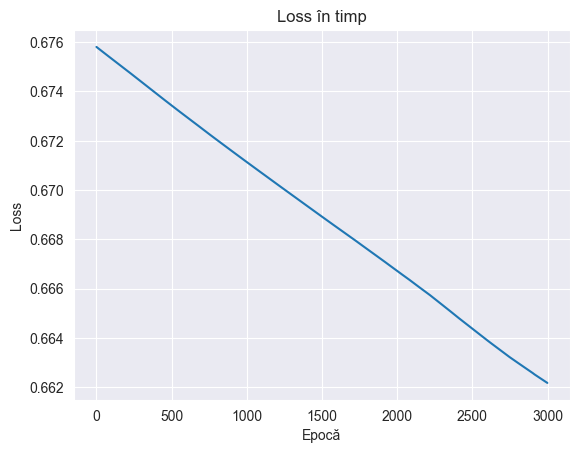


 Acuratețea pe test set (inversată): 73.08%

 Matrice de confuzie:
[[12  1]
 [ 6  7]]


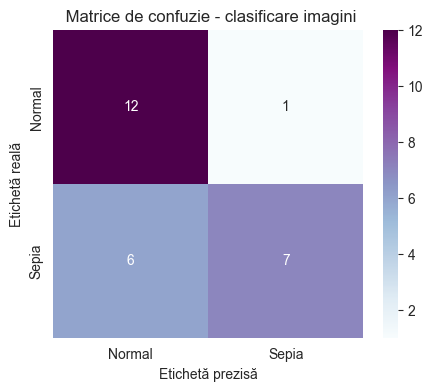

In [52]:

X, y = load_sepia_data_owned("dataset", size=(64, 64))


trainX, trainY, valX, valY = separate_date(X.tolist(), y.tolist())
X_train = np.array(trainX)
y_train = np.array(trainY).reshape(-1, 1)
X_test = np.array(valX)
y_test = np.array(valY).reshape(-1, 1)
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

np.random.seed(42)
model = ANN(input_size=X.shape[1], hidden_size=128)
model.train(X_train, y_train, epochs=3000, lr=0.0001)

y_pred = 1 - model.predict(X_test) 
acc = np.mean(y_pred == y_test)
print(f"\n Acuratețea pe test set (inversată): {acc * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
print("\n Matrice de confuzie:")
print(cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu", xticklabels=["Normal", "Sepia"], yticklabels=["Normal", "Sepia"])
plt.xlabel("Etichetă prezisă")
plt.ylabel("Etichetă reală")
plt.title(" Matrice de confuzie - clasificare imagini")
plt.show()



- aici initial aveam 64 de neuroni pe stratul de intrare, un nr de epoci mic si lr de 0.1... si mi a dat acuratetea 7% 
- <i> Pentru toate testele de mai jos avem un numar de 2000 de epoci </i> 
- am modificat la 128 de neuroni si lr ul la 0.001 si mi a dat 57%
- daca am adaugat lr=0.00001, a scauzt la 41% => invata prea lent si nu converge 
- daca punem lr= 0.01 : acuratetea a scazut la 19% sare prea mult si modelul se zbate cumva 
- lr = 0.001 : acuratetea 34% a crescut, dar tot sare si 256 de noduri pe hidden layer 
- acelasi lr dar mai putine noduri - a devenit o acuratete de 50% - modelul iese din overfitting
- lr = 0.0001 + 128 noduri  - sub 40%
- acum daca am schimbat la 3000 de ecoci da 73%
- 

<h1> CNN - Cod Propriu </h1> 
pas 1: convolutie

In [2]:
def load_sepia_data_owned_cnn(folder="dataset", size=(64, 64)):
    X = []
    y = []

    for label, subfolder in enumerate(["pictures", "sepia"]):
        path = os.path.join(folder, subfolder)
        for fname in os.listdir(path):
            if fname.endswith((".jpg", ".jpeg", ".png")):
                img = Image.open(os.path.join(path, fname)).convert("L").resize(size)
                arr = np.array(img).astype("float32") / 255.0   
                X.append(arr)
                y.append(label)

    X = np.array(X)
    y = np.array(y).reshape(-1, 1)

    idx = np.random.permutation(len(X))
    return X[idx], y[idx]

In [3]:
def conv2d(image, kernel, padding=0, stride=1):
  
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    if padding > 0:
        padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        padded_image = image

    out_h = ((image_h - kernel_h + 2 * padding) // stride) + 1
    out_w = ((image_w - kernel_w + 2 * padding) // stride) + 1

    output = np.zeros((out_h, out_w))

    for y in range(0, out_h):
        for x in range(0, out_w):
            region = padded_image[y*stride:y*stride+kernel_h, x*stride:x*stride+kernel_w]
            output[y, x] = np.sum(region * kernel)

    return output

max pooling ca sa reducem dimensiunea imaginilor si sa pastram doar maximul 

In [4]:
def max_pooling2d(feature_map, size=2, stride=2):
    h, w = feature_map.shape
    out_h = (h - size) // stride + 1
    out_w = (w - size) // stride + 1
    pooled = np.zeros((out_h, out_w))

    for i in range(0, h - size + 1, stride):
        for j in range(0, w - size + 1, stride):
            region = feature_map[i:i+size, j:j+size]
            pooled[i // stride, j // stride] = np.max(region)

    return pooled

In [5]:
def flatten(feature_map):
    return feature_map.flatten().reshape(1, -1)

def dense_layer(input_vec, weights, bias):
    return np.dot(input_vec, weights) + bias

In [6]:
def forward(image, kernel, W, b):
    image = np.squeeze(image) 
    x = conv2d(image, kernel, padding=1)
    x = max_pooling2d(x)
    flat = flatten(x)
    z = np.dot(flat, W) + b
    out = sigmoid(z)
    return out, flat

def train(X_train, y_train, kernel, W, b, lr=0.01, epochs=10):
    for epoch in range(epochs):
        loss = 0
        for img, y_true in zip(X_train, y_train):
            y_pred, flat = forward(img, kernel, W, b)
            error = y_pred - y_true
            loss += np.squeeze(error**2)

            # BACKPROP: doar pe layer-ul fully connected
            dZ = error * sigmoid_deriv(y_pred)
            dW = flat.T @ dZ
            db = dZ

            W -= lr * dW
            b -= lr * db

        print(f"Epoch {epoch+1}: Loss = {loss/len(X_train):.4f}")
    return kernel, W, b

def predict(image, kernel, W, b):
    y_pred, _ = forward(image, kernel, W, b)
    return 1 if y_pred >= 0.5 else 0

def evaluate(X, y, kernel, W, b):
    correct = 0
    for img, label in zip(X, y):
        pred = predict(img, kernel, W, b)
        if pred == label:
            correct += 1
    return correct / len(X)

In [11]:
X, y = load_sepia_data_owned_cnn("dataset", size=(64, 64))


np.random.seed(42)
idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


kernel = np.random.randn(3, 3) * 0.1
feature_size = ((64 - 3 + 2*1) // 1 + 1) // 2
flat_size = feature_size * feature_size
W = np.random.randn(flat_size, 1) * 0.1
b = np.zeros((1, 1))


kernel, W, b = train(X_train, y_train, kernel, W, b, lr=0.01, epochs=15)


train_acc = evaluate(X_train, y_train, kernel, W, b)
test_acc = evaluate(X_test, y_test, kernel, W, b)

print(f"\n Acuratețe train: {train_acc * 100:.2f}%")
print(f" Acuratețe test:  {test_acc * 100:.2f}%")

Epoch 1: Loss = 0.2486
Epoch 2: Loss = 0.2484
Epoch 3: Loss = 0.2482
Epoch 4: Loss = 0.2480
Epoch 5: Loss = 0.2478
Epoch 6: Loss = 0.2476
Epoch 7: Loss = 0.2474
Epoch 8: Loss = 0.2472
Epoch 9: Loss = 0.2470
Epoch 10: Loss = 0.2468
Epoch 11: Loss = 0.2466
Epoch 12: Loss = 0.2464
Epoch 13: Loss = 0.2462
Epoch 14: Loss = 0.2460
Epoch 15: Loss = 0.2458

 Acuratețe train: 52.00%
 Acuratețe test:  50.00%
